# Medical Cost Insurance


In [2]:
#Importing libraries
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib  import * 
from scipy import stats
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Get the Data

I will work with the insurance csv file from the kaggle. 

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
* objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

**Read in the file as a DataFrame called insurance.**

In [4]:
insurance=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

**Check the head of the dataset, and check out its info() and describe() methods.**

In [5]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**The data is cleaned before I get the data. We usually need to preprocess real-world data by ourselves.**

In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**There are outliers in bmi, children, and charges by comparing each 75 percentiles and max.**

## Exploratory Data Analysis

**Let's explore the data!**

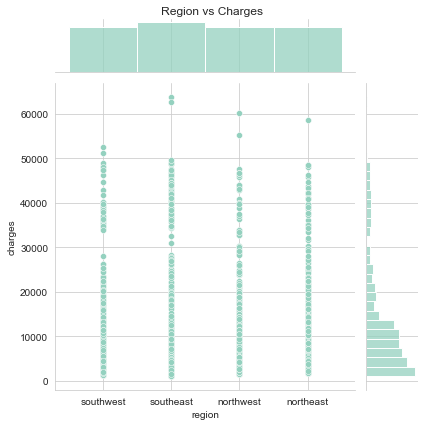

In [11]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
p=sns.jointplot(x='region',y='charges',data=insurance)
p.fig.suptitle('Region vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

**The number of insured people in the southeast is slightly higher than in others.**
<br> **The most of people's medical costs billed by health insurance are under $15,000.**

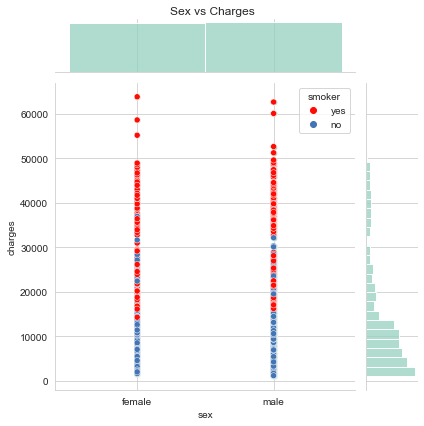

In [12]:
p=sns.jointplot(x='sex',y='charges',data=insurance)
p.fig.suptitle('Sex vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
g = p.plot_joint(sns.scatterplot, hue='smoker', data=insurance)

**There is no significant difference between male and female.**

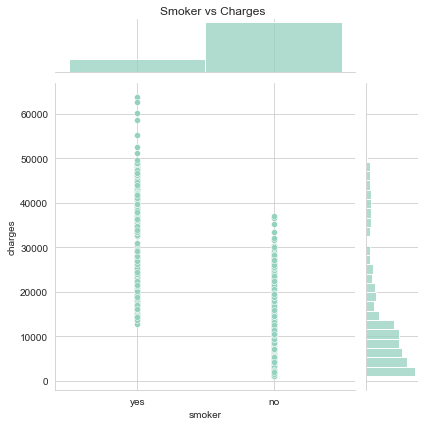

In [16]:
sns.set_palette("GnBu_d")
p=sns.jointplot(x='smoker',y='charges',data=insurance)
p.fig.suptitle('Smoker vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

**The smokers have higher medical cost, and only the smokers have the cost over $40,000.**

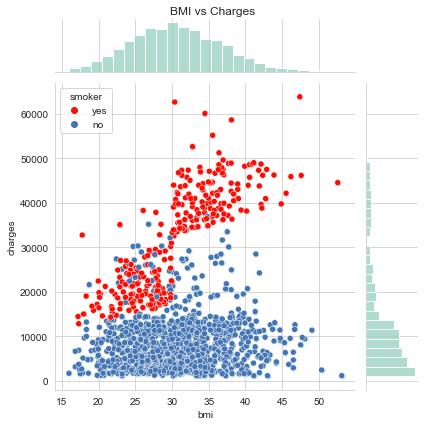

In [17]:
p=sns.jointplot(x='bmi',y='charges',data=insurance)
p.fig.suptitle('BMI vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
g = p.plot_joint(sns.scatterplot, hue='smoker', data=insurance)

**The distribution of BMI seems to be normal distribution.**

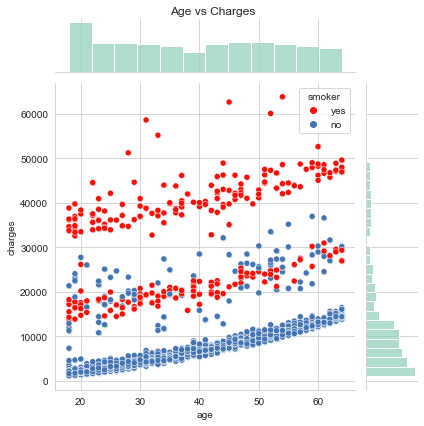

In [100]:
sns.set_palette("GnBu_d")
p=sns.jointplot(x='age',y='charges',data=insurance)
p.fig.suptitle('Age vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
g = p.plot_joint(sns.scatterplot, hue='smoker', data=insurance)

**From the plots above, I assume the insured people to three groups(Low risk, medium risk, and high risk)**
<br>**There are positve linear correlation between age and charge in all three groups, and the variance for medium and high risks are much higher than low risk.**


## Apply our assumption about risk groups by using K-means Clustering

We could use **the elbow method** to make sure the idea of 3 groups is a supporting guess.

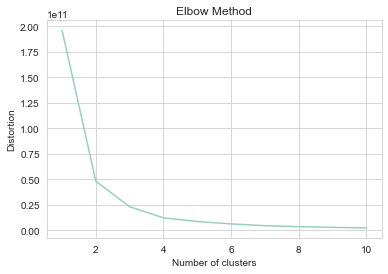

In [101]:
from sklearn.cluster import KMeans
sns.set_palette("GnBu_d")
Distortion = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(insurance[['age','bmi','charges']])
    Distortion.append(kmeans.inertia_)
plt.plot(range(1, 11), Distortion)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

**As the result shows, 3 is a resonable cluster number.**

**Label and load medical risk levels into the data**

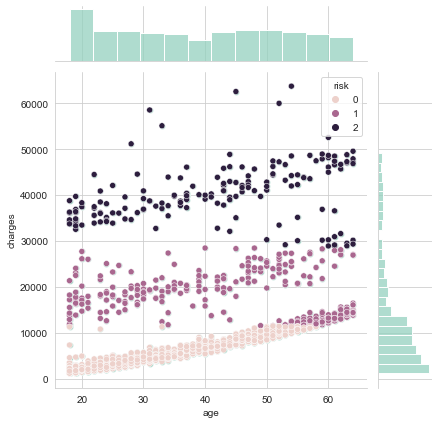

In [158]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(insurance[['age','bmi','charges']])
insurance['risk']=pred_y
grid=sns.jointplot(x='age',y='charges',data=insurance)
g = grid.plot_joint(sns.scatterplot, hue='risk', data=insurance)

**0 - Low risk; 1 - medium risk; 2 - high risk**

## Model bulding
### Classification
Because we added a variable of medical risk levels to the data, now we could build a classification model to predict risk level for people want to get insured.

In [26]:
# let's turn the categorical variables into dummy variabls(a series of zeros and ones)
d=pd.get_dummies(insurance)
d.head()

,age,bmi,children,charges,risk,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,1,1,0,0,1,0,0


#### Multinomial logistic regression

**Let's remove risk and charges and use others as predictors to predict risk levels.**

In [68]:
from sklearn.model_selection import train_test_split
X = d.drop(['risk','charges'],1)
y = d['risk']
#split the data to train and test sets(7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [69]:
# Train the logistic model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

**Prediction and Evaluation**

In [70]:

predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       247
           1       0.85      0.68      0.75       105
           2       0.93      0.86      0.90        50

    accuracy                           0.88       402
   macro avg       0.89      0.83      0.86       402
weighted avg       0.88      0.88      0.87       402



**The overall accuracy is 88%**

### Linear Regression
**Let's remove risk and charges and use others as predictors to predict medical cost.**

In [87]:
X = d.drop(['risk','charges'],1)
y = d['charges']
#split the data to train and test sets(7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [88]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [89]:
predictions = lm.predict( X_test)

In [90]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) # p.165
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4145.4505556275835
MSE: 33780509.574791625
RMSE: 5812.100272258869


In [97]:
print('R^2:',r2_score(y_test, predictions))

R^2: 0.7696118054369012


#### Use risk level as one of the predictors.

In [152]:
X = d.drop(['charges'],1)
y = d['charges']
#split the data to train and test sets(7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
lm_risk = LinearRegression()
lm_risk.fit(X_train,y_train)
predictions_risk = lm_risk.predict(X_test)

In [154]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_risk)) # p.165
print('MSE:', metrics.mean_squared_error(y_test, predictions_risk))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_risk)))

MAE: 2882.1659061095024
MSE: 15389559.214505993
RMSE: 3922.9528692690146


In [156]:
print('R^2:',r2_score(y_test, predictions_risk))

R^2: 0.8950408739482786


**We got a 0.89 R^2 without even a hard try!**

## Conclusion
1. Do not smoke!
2. Based on the data we have, we could predict each customer's medical risk level which could be significant to the prediction of the medical cost.

## Suggestion
1. With more data, it worths trying other advanced models such as SVM and Random Forest Model to predict the risk level and charges.
2. We could notice the logistic model did not perform very well at predicting medium risk level, and this could be a direction for our analysis on 